# Titanic Dataset
Predict the survival of Titanic passenger

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [383]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [384]:
titanic[['pclass', 'class', 'survived', 'alive', 'embarked', 'embark_town']].head(10)

,pclass,class,survived,alive,embarked,embark_town
0,3,Third,0,no,S,Southampton
1,1,First,1,yes,C,Cherbourg
2,3,Third,1,yes,S,Southampton
3,1,First,1,yes,S,Southampton
4,3,Third,0,no,S,Southampton
5,3,Third,0,no,Q,Queenstown
6,1,First,0,no,S,Southampton
7,3,Third,0,no,S,Southampton
8,3,Third,1,yes,S,Southampton
9,2,Second,1,yes,C,Cherbourg


*Observations*
1. pclass & class, survived & alive are same features. So, drop non-numeric feature.
2. embarked and embark_town provide same information
- 'S' = Southampton
- 'C' = Cherbourg
- 'Q' = Queenstown

In [385]:
titanic.drop(['class', 'alive', 'embark_town'], axis=1, inplace=True)
titanic.shape

(891, 12)

## Null values

In [386]:
titanic.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          688
alone           0
dtype: int64

### 1. age

In [387]:
titanic.age.mean(), titanic.age.median()

(29.69911764705882, 28.0)

**Plot age distribution**

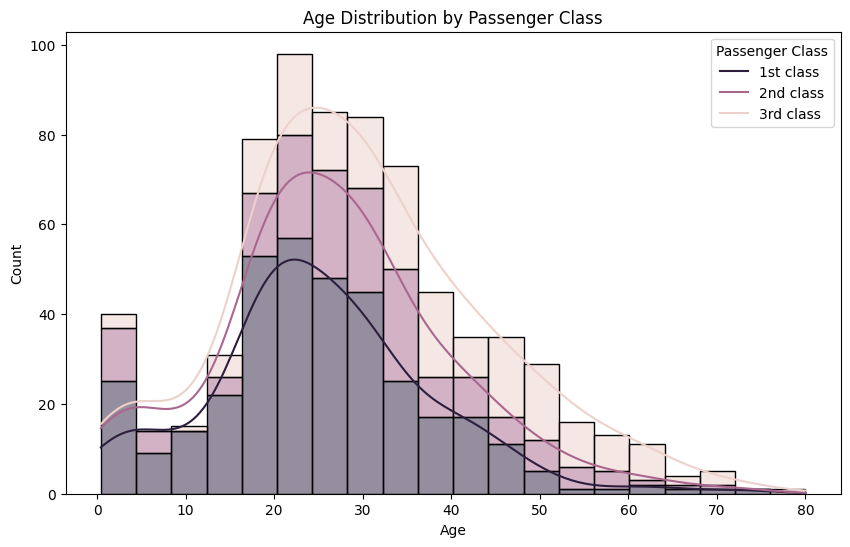

In [388]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='pclass', multiple='stack', kde=True)
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Age")
plt.ylabel('Count')
plt.legend(title='Passenger Class', labels=['1st class', '2nd class', '3rd class'])
plt.show()

In [389]:
print('Median for Age seperated by pclass')
age_by_class = titanic.groupby('pclass')['age']
age_by_class.median()

Median for Age seperated by pclass


pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

In [390]:
print('Median for age seperated by pclass and sex')
titanic.groupby(['pclass', 'sex'])['age'].median()

Median for age seperated by pclass and sex


pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64

Median of age differs for different passenger class. So use these median values to replace the null age values.

In [391]:
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))

### 2. deck

*deck column has more than 50% null values so drop the entire column*

In [392]:
titanic.drop('deck', axis=1, inplace=True)

### 3. embarked
*embarked column has only 2 null values so drop these rows*

In [393]:
titanic.dropna(inplace=True)

In [394]:
titanic.shape

(889, 11)

## Feature Engineering

In [395]:
df = titanic.copy()

In [396]:
# String columns
df.select_dtypes(include=['object']).columns

Index(['sex', 'embarked', 'who'], dtype='object')

### Booleans

In [397]:
df['alone'] = df['alone'].astype(int)
df['adult_male'] = df['adult_male'].astype(int)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,1,0
1,1,1,female,38.0,1,0,71.2833,C,woman,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,0,1


### 1. Label Encoding

In [398]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [399]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

### 2. One Hot Encoding

**Categorical Columns**

In [400]:
def unique_col_values(cols):
    for col in cols:
        print(f'{col} \t {df[col].unique()}')

In [401]:
unique_col_values(['who', 'embarked'])

who 	 ['man' 'woman' 'child']
embarked 	 ['S' 'C' 'Q']


In [402]:
# Encoding 'embarked' column
df_encoded = pd.get_dummies(df['embarked'], drop_first=True, prefix='embarked').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('embarked', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,man,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,woman,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,woman,0,1,0,1


In [403]:
# Encoding 'who' column
df_encoded = pd.get_dummies(df['who'], drop_first=True, prefix='who').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('who', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_Q,embarked_S,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,1,0,0,1,1,0
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,1,0,1,0,1


## Correlation

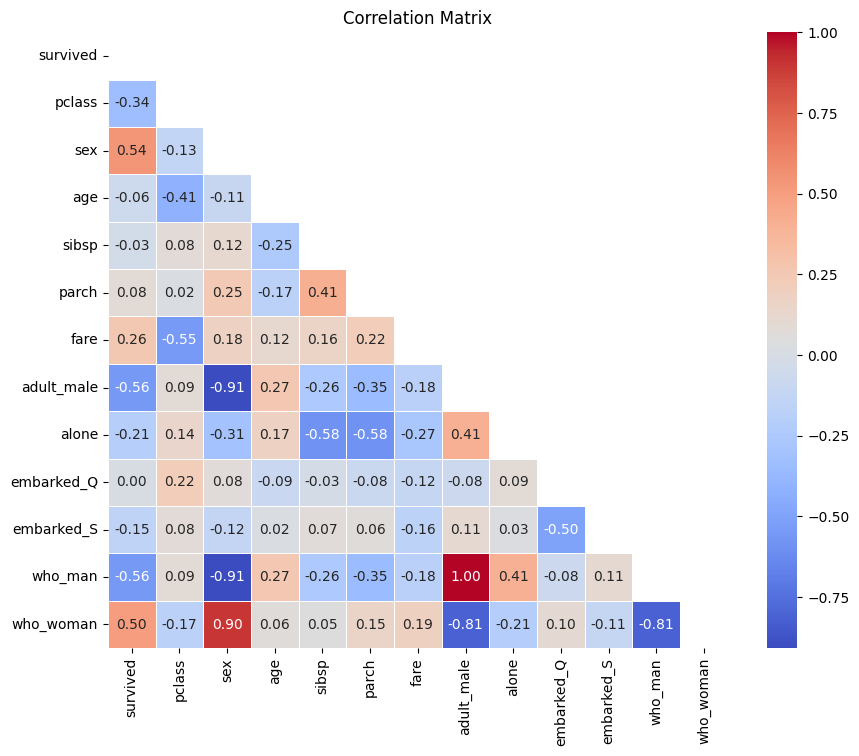

In [404]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=ax)
plt.title("Correlation Matrix")
plt.show()


## Finding Optimal Models and Hyperparameters

In [405]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [406]:
from sklearn.model_selection import GridSearchCV

In [407]:
X = df.drop('survived', axis=1)
y = df['survived']

In [408]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }
}

In [409]:
scores = []

for model_name, mp in model_params.items():
    print(f'Running {model_name} model...')
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df2 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df2

Running svm model...
Running knn model...
Running decision_tree model...
Running random_forest model...
Running logistic_regression model...
Running naive_bayes_gaussian model...
Running naive_bayes_multinomial model...


,model,best_score,best_params
0,svm,0.734552,"{'C': 1, 'kernel': 'rbf'}"
1,knn,0.733422,{'n_neighbors': 3}
2,decision_tree,0.795309,{'criterion': 'gini'}
3,random_forest,0.805447,{'n_estimators': 10}
4,logistic_regression,0.820066,{'C': 10}
5,naive_bayes_gaussian,0.806570,{}
6,naive_bayes_multinomial,0.703072,{}


**Here, the best model is LogisticRegression (C=10)**

## LogisticRegression

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [412]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10)
lr.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [413]:
lr.score(X_test, y_test)

0.8370786516853933

## Model Performance Analysis
Confusion Matrix

In [414]:
y_predicted = lr.predict(X_test)

In [415]:
from sklearn.metrics import confusion_matrix

In [416]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[100,  15],
       [ 14,  49]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

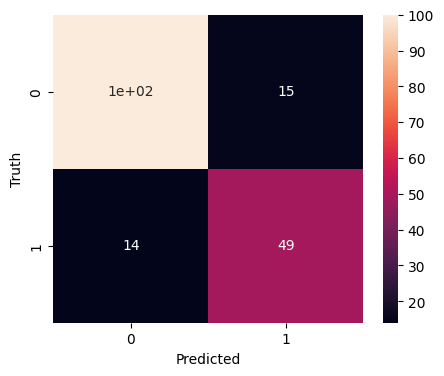

In [417]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')